# Visuals of cycling routes

In [35]:
import osmnx as ox
from typing import Tuple, List, Iterable, Dict
import matplotlib.pyplot as plt

In [ ]:
G = ox.graph_from_place("Bratislava, Slovakia", network_type="drive")

In [37]:
def make_edges(
    G,
    highlight_streets:Dict[str, str]=None,
    default:Tuple[str,float]=('gray', 0.5)) -> Tuple[List[str], List[float]]:
    highlight_edges = []
    highlight_colors = []
    for u, v, k, data in G.edges(keys=True, data=True):
        if "name" in data:
            if isinstance(data["name"], list):
                for name in data["name"]:
                    if name in highlight_streets:
                        color = highlight_streets.get(name, default[0])
                        highlight_edges.append((u, v, k))
                        highlight_colors.append(color)
            else:
                if data["name"] in highlight_streets:
                    color = highlight_streets.get(data["name"], default[0])
                    highlight_edges.append((u, v, k))
                    highlight_colors.append(color)
    edge_colors = []
    edge_widths = []
    dc, dw = default
    for u, v, k in G.edges(keys=True):
        if (u, v, k) in highlight_edges:
            color = highlight_colors[highlight_edges.index((u, v, k))]
            edge_colors.append(color)
            edge_widths.append(3)
        else:
            edge_colors.append(dc)
            edge_widths.append(dw)
    return edge_colors, edge_widths

In [49]:
def plot_graph(graph, edges:Tuple[List[str], List[float]]):
    fig, ax = plt.subplots(figsize=(10, 8))
    fig, ax = ox.plot_graph(
    graph,
    ax=ax,
    node_size=5,
    edge_color=edges[0],
    edge_linewidth=edges[1],
    bgcolor='white',
    show=False,
    close=False,
    )
    return fig, ax


# **Dunajská**

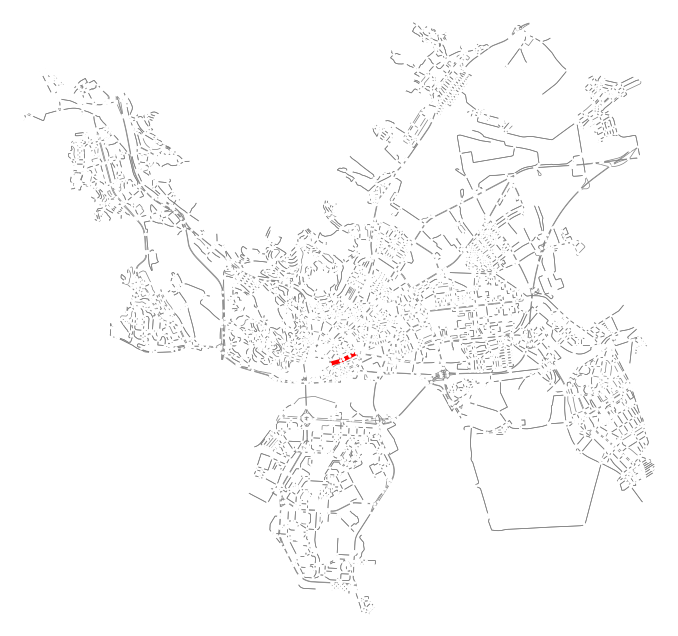

In [39]:
route_streets = {"Dunajská": "red"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Vajanského nábrežie**

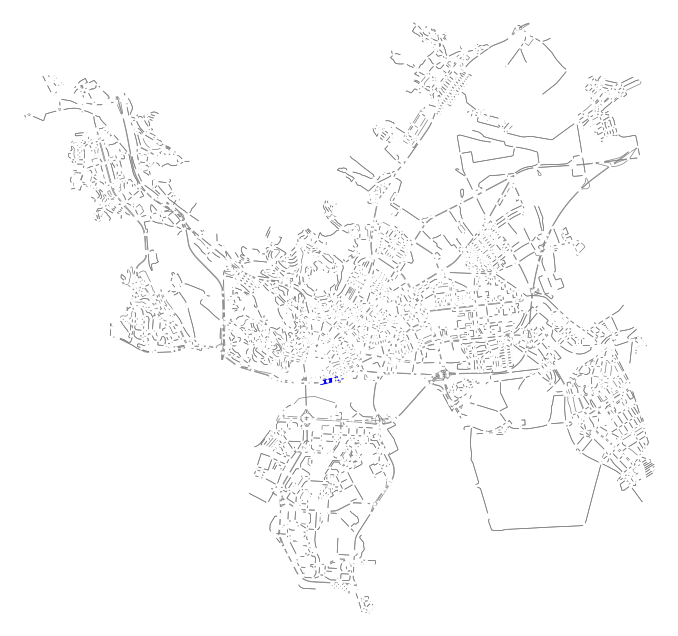

In [40]:
route_streets = {"Vajanského nábrežie": "blue"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **River park**

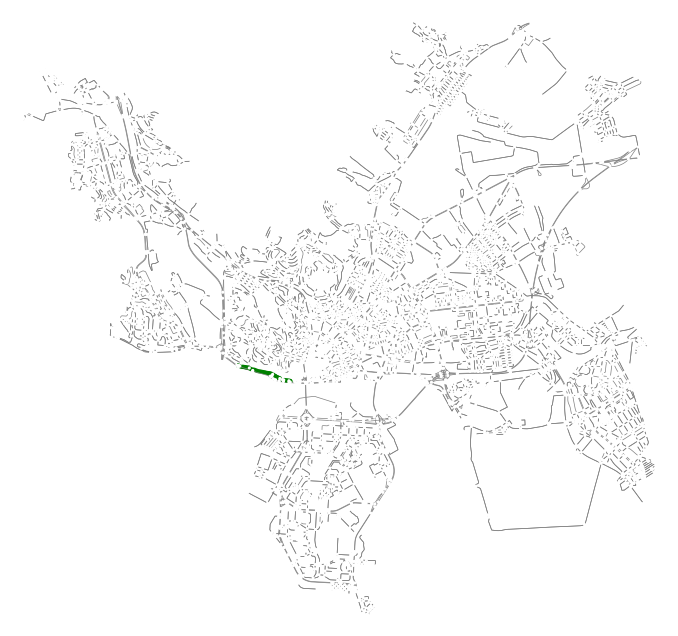

In [41]:
route_streets = {"Žižkova": "green"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Železná studnička**

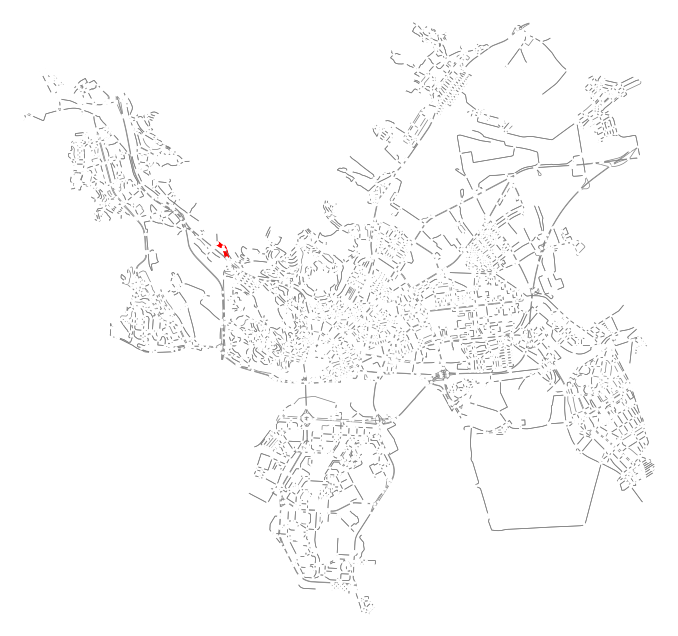

In [42]:
route_streets = {"K Železnej studienke": "red"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Einsteinova**

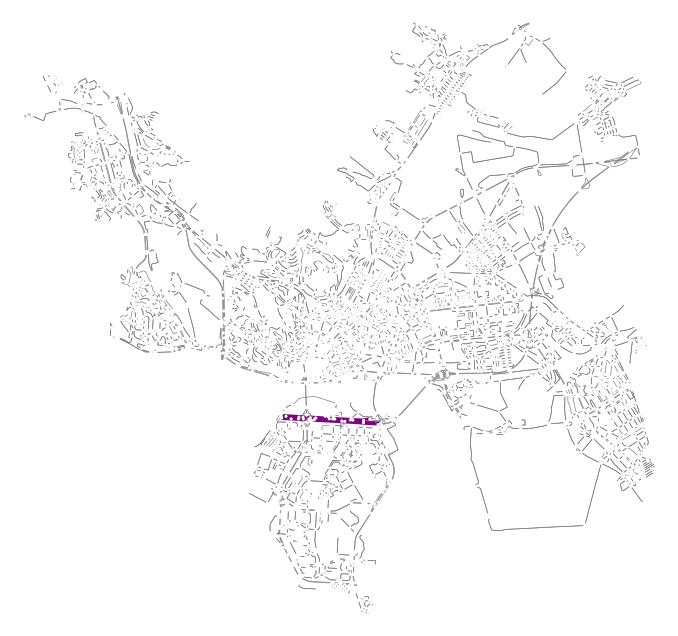

In [43]:
route_streets = {"Einsteinova": "purple"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Páričkova**

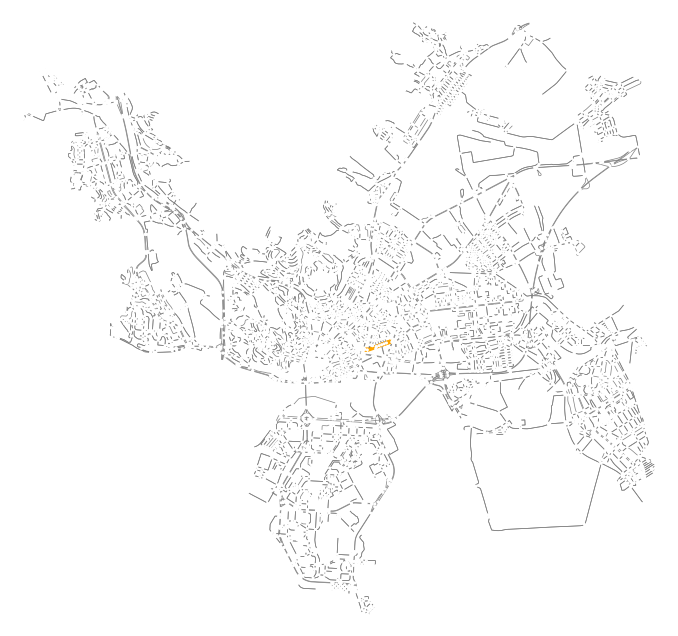

In [44]:
route_streets = {"Páričkova": "orange"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

# **Viedenská**

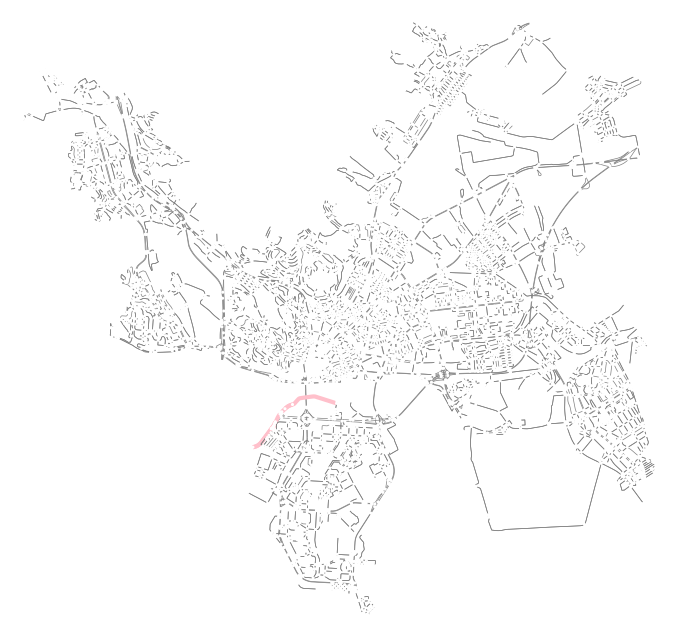

In [45]:
route_streets = {"Viedenská cesta": "pink"}
edges = make_edges(G, route_streets)
fig, ax = plot_graph(G, edges)

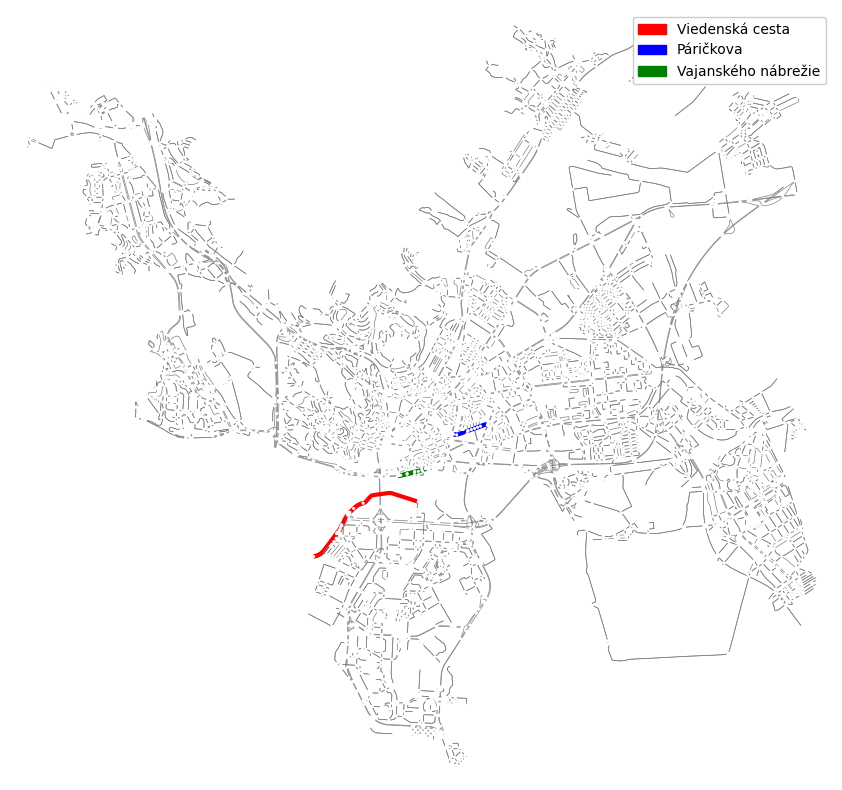

In [50]:
import matplotlib.patches as mpatches
colors = {'Viedenská cesta': 'red', 'Páričkova': 'blue', 'Vajanského nábrežie': 'green'}
edges = make_edges(G, colors)
fig, ax = plot_graph(G, edges)

# Add legend with better visibility
patches = [mpatches.Patch(color=color, label=street) for street, color in colors.items()]
ax.legend(handles=patches, loc='upper right', fontsize=10, framealpha=0.98)
plt.tight_layout()
plt.show()

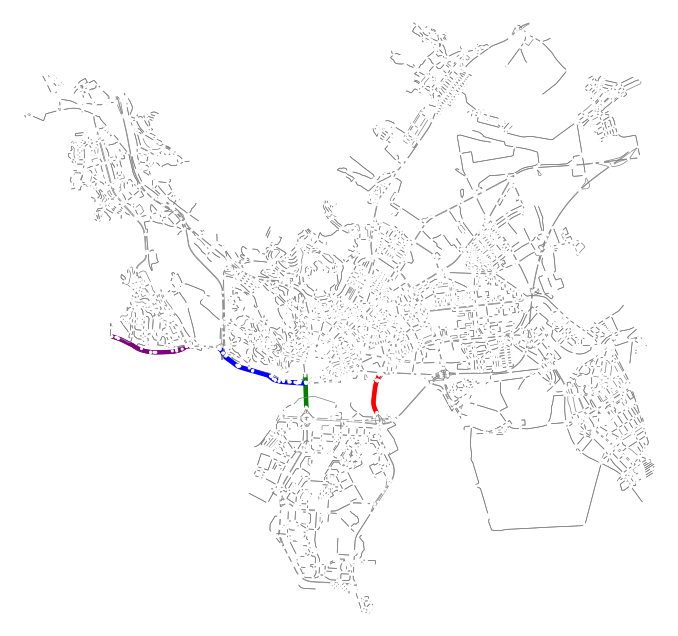

In [68]:
investigate = {
    'Most Apollo': 'red',
    'Nábrežie arm. gen. Ludvíka Svobodu': 'blue',
    'Most SNP': 'green',
    'Devínska cesta': 'purple',
}
edges = make_edges(G, investigate)
fig, ax = plot_graph(G, edges)